In [2]:
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [52.0, 55.5, 61.0, 64.0, 68.0, 74.0, 78.0, 83.0, 88.0, 94.0]

In [3]:
def lcg_next():
    if not hasattr(lcg_next, "seed"):
        lcg_next.seed = 12345
    a = 1664525
    c = 1013904223
    m = 2**32
    lcg_next.seed = (a * lcg_next.seed + c) % m
    return lcg_next.seed

def lcg_randint(low, high):
    span = high - low + 1
    m = 2**32
    limit = (m // span) * span
    while True:
        r = lcg_next()
        if r < limit:
            return low + (r % span)

In [4]:
def predictions(features, weight, bias):
    predicted_labels = []
    for i in range(len(features)):
        value = features[i]*weight + bias
        predicted_labels.append(value)
    return predicted_labels

def calc_mse(labels, predicted_labels):
    MSE = 0
    n_samples = len(labels)
    for i in range(n_samples):
        square_error = (labels[i] - predicted_labels[i])**2
        MSE += square_error
    MSE = 1/n_samples * MSE
    return MSE

def gradient_weight(features, labels, predicted_labels, example):
    n_samples = len(labels)
    grad_w = 0
    i = example
    error= predicted_labels[i]-labels[i]
    grad_w += features[i]* error
    grad_w = 2/n_samples * grad_w
    return grad_w

def gradient_bias(labels, predicted_labels, example):
    n_samples = len(labels)
    grad_b = 0
    i =  example
    error = (predicted_labels[i]-labels[i])
    grad_b += error
    grad_b = 2/n_samples * grad_b
    return grad_b

def update_weight(learning_rate, weight_gradient, weight):
    new_weight = weight - learning_rate * weight_gradient
    return new_weight

def update_bias(learning_rate, bias_gradient, bias):
    new_bias = bias - learning_rate * bias_gradient
    return new_bias

def Train(features, labels, weight, bias, learning_rate, epochs):
    predicted_labels = predictions(features, weight, bias)
    loss_history = []
    for i in range(epochs):
        example = lcg_randint(0, len(labels)-1)
        grad_w = gradient_weight(features, labels, predicted_labels, example)
        grad_b = gradient_bias(labels, predicted_labels, example)
        weight = update_weight(learning_rate, grad_w, weight)
        bias = update_bias(learning_rate, grad_b, bias)
        predicted_labels = predictions(features, weight, bias)
        MSE = calc_mse(labels, predicted_labels)
        loss_history.append(MSE)
    return weight, bias, loss_history


In [12]:
w = 0
b = 0
lr = 0.001
epochs = 100000

w, b, loss_history = Train(x, y, w, b, lr, epochs)

print(w, b)
y_pred = predictions(x, w, b)
MSE = calc_mse(y, y_pred)
print(MSE)
print(loss_history)

4.727257786319931 45.64800828654409
0.8092580643867694
[5264.8009817600005, 5149.672727349131, 5117.23854157727, 5005.768001449313, 4915.804714943622, 4809.329059973301, 4686.349166550341, 4645.482088291283, 4615.774747195347, 4548.051204892011, 4467.136912092122, 4401.711470007363, 4373.340735370119, 4244.07059229098, 4235.058930445816, 4173.22454191557, 4146.117515721625, 4058.6587006211944, 4049.9144413338945, 4033.0954371495936, 4024.390080699397, 3939.9192946623953, 3914.117156498891, 3897.739393572616, 3872.175874037776, 3791.4447574853275, 3783.0957508157862, 3749.680595375461, 3684.519802844238, 3668.8949389855284, 3580.1870767427085, 3548.468996633148, 3508.2346832570584, 3457.676200313763, 3398.2789175367566, 3329.1845712590994, 3291.502403948314, 3225.0263501708337, 3203.3047520535906, 3174.768257161924, 3120.953891738914, 3058.6504235080874, 2988.116090118668, 2974.844579755863, 2941.3097014099258, 2928.202499096251, 2908.2235911647986, 2895.233663987967, 2846.9279679848, 2

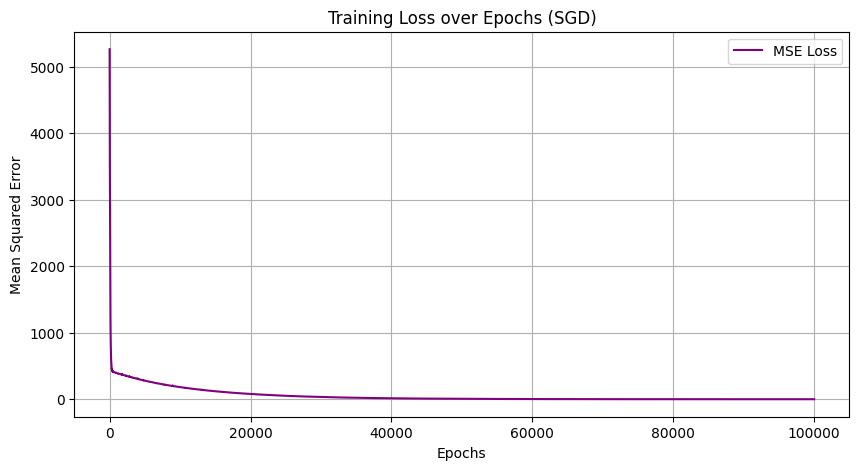

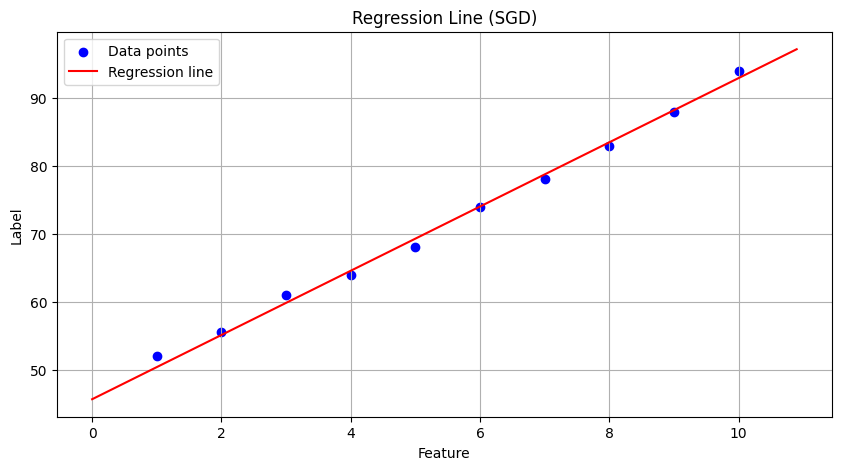

In [13]:
import matplotlib.pyplot as plt

# ---------- Plot 1: Loss over epochs ----------
plt.figure(figsize=(10,5))
plt.plot(range(len(loss_history)), loss_history, color='purple', linestyle='-', label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss over Epochs (SGD)')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot 2: Regression line with data ----------
plt.figure(figsize=(10,5))

# Scatter original data
features = x
labels = y
weight =  w
bias = b
plt.scatter(features, labels, color='blue', label='Data points')

# Regression line
x_line = [min(features)-1 + i*0.1 for i in range(int((max(features)-min(features)+2)*10))]
y_line = [weight*x + bias for x in x_line]
plt.plot(x_line, y_line, color='red', linestyle='-', label='Regression line')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Regression Line (SGD)')
plt.legend()
plt.grid(True)
plt.show()
